1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [2]:
import numpy as np
from scipy import stats

hurricanes_2005 = 15
hurricanes_average = 6.3
alpha = 0.022

prob_15_or_more = 1 - stats.poisson.cdf(hurricanes_2005 - 1, hurricanes_average)
print("Probability of observing 15 or more hurricanes:", prob_15_or_more)
if prob_15_or_more < alpha:
    print("The number of hurricanes in 2005 is significantly larger than the historic average.")
else:
    print("The number of hurricanes in 2005 is not significantly larger than the historic average.")

Probability of observing 15 or more hurricanes: 0.002217122790073134
The number of hurricanes in 2005 is significantly larger than the historic average.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [3]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

xbar_pre = np.mean(pre)
xbar_post = np.mean(post)

sigma_pre = np.std(pre, ddof=1)
sigma_post = np.std(post, ddof=1)
sigma = np.sqrt((sigma_pre**2 +sigma_post**2)/2)

n = len(pre)  # or len(post)

T = (xbar_pre - xbar_post) / (sigma * np.sqrt(2/n))
print("T =", T)
pvalue = stats.t.cdf(T, n-1) + (1 - stats.t.cdf(-T, n-1))
print("p-value:", pvalue)

alpha = 0.05
if pvalue < alpha:
    print("The change in blood pressures is statistically significant.")
else:
    print("There is no significant change in blood pressures.")

T = -3.786997938137629
p-value: 0.004302464132864604
The change in blood pressures is statistically significant.


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

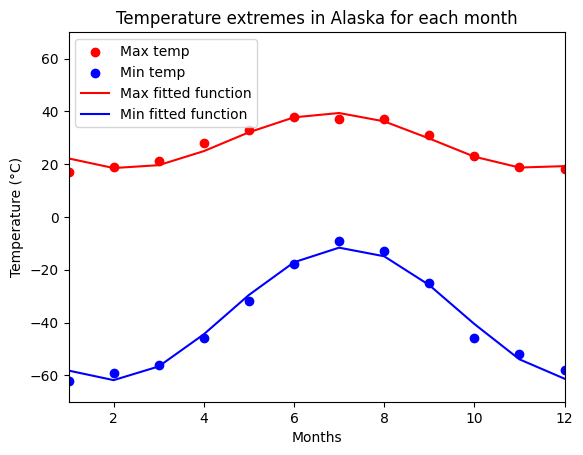

In [4]:
import matplotlib.pyplot as plt
from scipy import optimize

max_temp = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(12)+1

plt.scatter(months, max_temp, color='red', label='Max temp')
plt.scatter(months, min_temp, color='blue', label='Min temp')
plt.xlim(min(months), max(months))
plt.ylim(-70, +70)
plt.xlabel("Months")
plt.ylabel("Temperature (°C)")
plt.title("Temperature extremes in Alaska for each month")

# The curves seem to be periodic like a sinus or cosine function.
def f_max(x, a, b, d):
    return a * np.sin(b * x) + d

def f_min(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

(a_max, b_max, d_max), pcov_max = optimize.curve_fit(f_max, months, max_temp)
(a_min, b_min, c_min, d_min), pcov_min = optimize.curve_fit(f_min, months, min_temp)

t_max = f_max(months, a_max, b_max, d_max)
t_min = f_min(months, a_min, b_min, c_min, d_min)

plt.plot(months, t_max, color='red', label='Max fitted function')
plt.plot(months, t_min, color='blue', label='Min fitted function')
plt.legend(loc='best')
plt.show()

# The fit is reasonable for the two curves.
# We observe that for min, it is necessary to have an non-null offset, unlike for max.


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

In [5]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

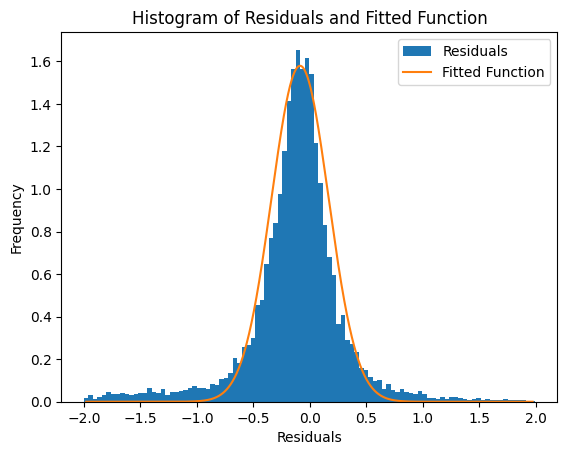

Degrees of freedom: 98
Chi-squared statistic: 3.1604994262951793
P-value of the fit: 1.0
The fit function is appropriate to describe the data.


In [7]:
import pickle
import pandas as pd

file_path = 'data/residuals_261.pkl'
residuals_infile = open(file_path, 'rb')
residuals_dict = pickle.load(residuals_infile)
residuals_infile.close()

df = pd.DataFrame(residuals_dict.item())
residuals = df[df['residuals'].abs() < 2]

h, bins, _ = plt.hist(residuals['residuals'], bins=100, density=True, label='Residuals')
bin_centers = (bins[:-1] + bins[1:]) / 2
sigma = np.sqrt(np.abs(h))

def fit_function(x, mu, sigma):
    return stats.norm.pdf(x, mu, sigma)

popt, pcov = optimize.curve_fit(fit_function, bin_centers, h)

x = np.linspace(min(bin_centers), max(bin_centers), 100000)
plt.plot(x, fit_function(x, *popt), label='Fitted Function')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals and Fitted Function')
plt.legend()
plt.show()

ndof = len(h) - len(popt)
chi2 = np.sum(((h - fit_function(bin_centers, *popt))**2) / sigma**2)
p_value = 1 - stats.chi2.cdf(chi2, ndof)

print("Degrees of freedom:", ndof)
print("Chi-squared statistic:", chi2)
print("P-value of the fit:", p_value)

# Check if the fit is appropriate (p-value > 0.05)
if p_value > 0.05:
    print("The fit function is appropriate to describe the data.")
else:
    print("The fit function is not appropriate to describe the data.")

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [ ]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

The best-fit parameter values:
a: -9.988133689134516 +- 0.17961047334210886
a: 12.333023014196588 +- 0.01798305242276112
a: 9.38411486809072 +- 0.12700529122712614


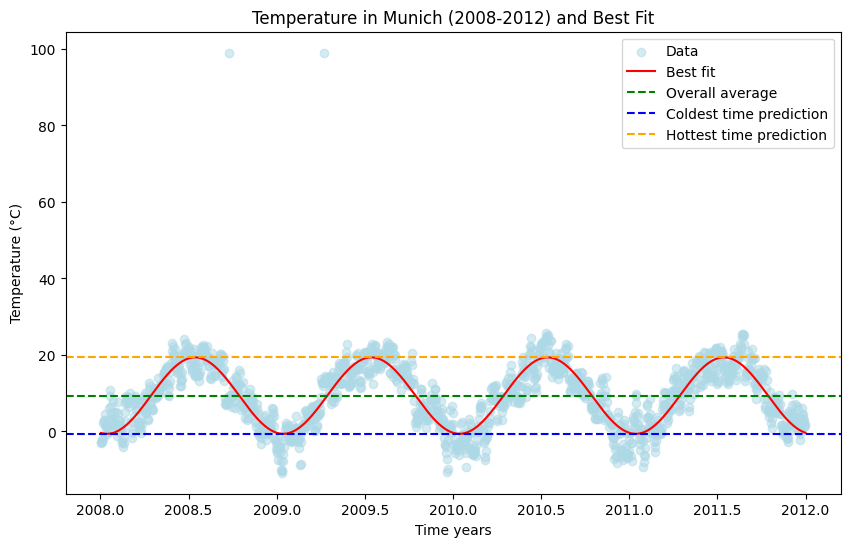

In [147]:
data = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt')

def f(t, a, b, c):
    return a * np.cos(2*np.pi*t + b) + c

x = data[:, 0]
y = data[:, 1]

mask = (x >= 2008) & (x <= 2012)
x = x[mask]
y = y[mask]

popt, pcov = optimize.curve_fit(f, x, y)
a_fit, b_fit, c_fit = popt
a_err, b_err, c_err = np.sqrt(np.diag(pcov))
print("The best-fit parameter values:")
print(f"a: {a_fit} +- {a_err}")
print(f"a: {b_fit} +- {b_err}")
print(f"a: {c_fit} +- {c_err}")

plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.5, color='lightblue', label='Data')
plt.plot(x, f(x, a_fit, b_fit, c_fit), color='red', label='Best fit')
plt.xlabel("Time years")
plt.ylabel("Temperature (°C)")
plt.title('Temperature in Munich (2008-2012) and Best Fit')

overall_average_temp = np.mean(y)
coldest_time_prediction = np.min(f(x, a_fit, b_fit, c_fit))
hottest_time_prediction = np.max(f(x, a_fit, b_fit, c_fit))
plt.axhline(overall_average_temp, linestyle='--', color='green', label='Overall average')
plt.axhline(coldest_time_prediction, linestyle='--', color='blue', label='Coldest time prediction')
plt.axhline(hottest_time_prediction, linestyle='--', color='orange', label='Hottest time prediction')

plt.legend(loc='best')
plt.show()

# The b parameter represents the phase shift of the cosine function.
# In the context of temperature data, it indicates the time of year when the temperature is at its maximum.

The best-fit parameter values:
a: -9.982183881231062 +- 0.1805408432280612
a: 1.0014440576722103 +- 0.0025489513137453065
a: -5.9047271750555055 +- 32.19158239102498
a: 9.398124918050614 +- 0.1294101095749084

SSR of f: 473504.8278767305
SSR of g: 34352.794053704085

f vs g:
p-value: 0.000 , additional parameter necessary: YES


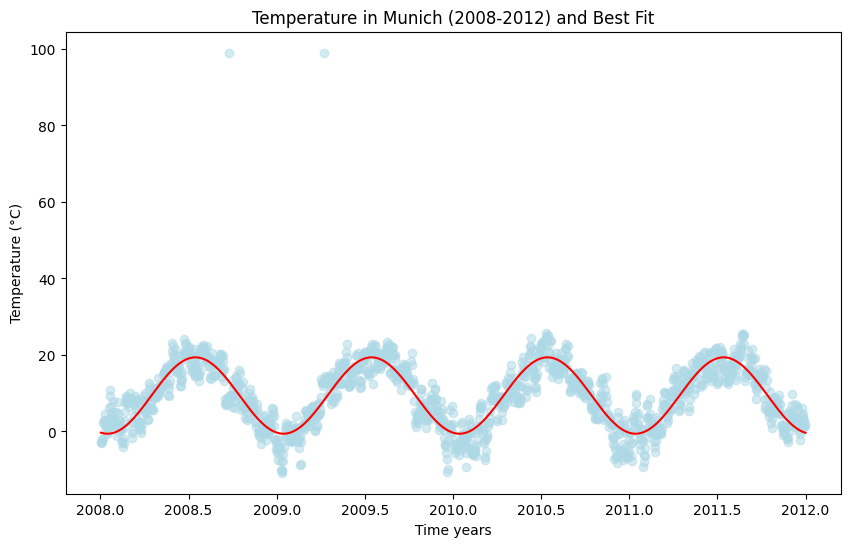

In [154]:
def g(t, a, b, c, d):
    return a * np.cos(2*np.pi*b*t + c) + d

popt, pcov = optimize.curve_fit(g, x, y)
e_fit, f_fit, g_fit, h_fit = popt
e_err, f_err, g_err, h_err = np.sqrt(np.diag(pcov))
print("The best-fit parameter values:")
print(f"a: {e_fit} +- {e_err}")
print(f"a: {f_fit} +- {f_err}")
print(f"a: {g_fit} +- {g_err}")
print(f"a: {h_fit} +- {h_err}\n")

plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.5, color='lightblue', label='Data')
plt.plot(x, g(x, e_fit, f_fit, g_fit, h_fit), color='red', label='Best fit')
plt.xlabel("Time years")
plt.ylabel("Temperature (°C)")
plt.title('Temperature in Munich (2008-2012) and Best Fit')

ssr_f = np.sum((f(x, a_fit, b_fit, c_fit)-y)**2)
ssr_g = np.sum((g(x, e_fit, f_fit, g_fit, h_fit)-y)**2)
print(f"SSR of f: {ssr_f}")
print(f"SSR of g: {ssr_g}\n")

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

ndof_f = 2
ndof_g = 3
print("f vs g:")
pval_1_vs_2 = Ftest(ssr_f, ssr_g, ndof_f, ndof_g, n, verbose=True)